In [1]:
# Start with the import statements

# Data Handling
import numpy as np
import pandas as pd

# Machine Learning
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

# Plotting
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
df_orig = pd.read_csv("clothingLog.csv", index_col = 0)

df = df_orig.copy()

df.head()

,Day,Shirt Color 1,Shirt Color 2,Pants Color
Date,,,,
7/1/2019,Monday,White,Brown,Brown
7/2/2019,Tuesday,Black,White,Black
7/3/2019,Wednesday,None,None,Black
7/4/2019,Thursday,None,None,Grey
7/5/2019,Friday,None,None,White


In [3]:
cols = df.columns
rows = df.index
days = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}

colors = {
    "None": 0,
    "White": 1,
    "Blue": 2,
    "Teal": 3,
    "Brown": 4,
    "Orange": 5,
    "Red": 6,
    "Grey": 7,
    "Black": 8
}

def find_colors(colorNum):
    for key in colors.keys():
        if colorNum == colors[key]:
            return key
    return -1

print(days)
print(colors)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
{'None': 0, 'White': 1, 'Blue': 2, 'Teal': 3, 'Brown': 4, 'Orange': 5, 'Red': 6, 'Grey': 7, 'Black': 8}


In [4]:
for row in range(df.shape[0]):
    # First numericize the day of the week
    val = df.loc[rows[row], cols[0]]
    if isinstance(val, str):
        df.loc[rows[row], cols[0]] = days[val]
    
    # Next numericize the colors
    for col in range(1,4):
        color = df.loc[rows[row], cols[col]]
        if isinstance(color, str):
            df.loc[rows[row], cols[col]] = colors[color]

df.head()

,Day,Shirt Color 1,Shirt Color 2,Pants Color
Date,,,,
7/1/2019,1,1,4,4
7/2/2019,2,8,1,8
7/3/2019,3,0,0,8
7/4/2019,4,0,0,7
7/5/2019,5,0,0,1


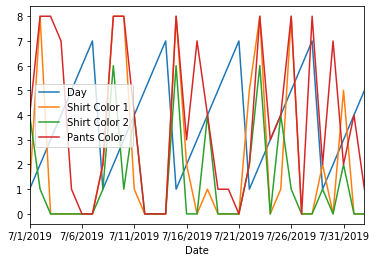

In [5]:
df.plot()

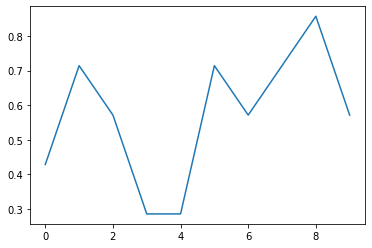

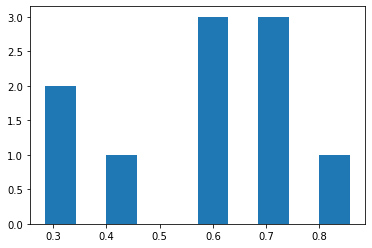

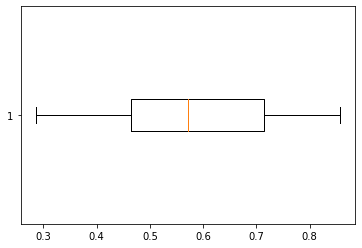

In [9]:
forecast_col = "Pants Color" # Forecast the Pants Color Column

X = np.array(df.drop([forecast_col], 1))

y = np.array(df[forecast_col])

numTrials = 10

results = []

for i in range(numTrials):
    percent_split = 0.2
    X_train, X_test, y_train, y_test = model_selection.\
                        train_test_split(X, y, test_size = percent_split)

    clf = svm.SVC(gamma = 'auto')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    results.append(confidence)

plt.plot(results)
plt.show()
    
plt.hist(results)
plt.show()
    
plt.boxplot(results, vert = False)
plt.show()

In [10]:
prediction = clf.predict(X_test)
color_pred = []
color_testInput = []
color_labeled = []

for p in prediction:
    color_pred.append(find_colors(p))

for r in X_test:
    color_row = []
    for val in r[1:]:
        color_row.append(find_colors(val))
    color_testInput.append(color_row)
    
for v in y_test:
    color_labeled.append(find_colors(v))

df_pred = pd.DataFrame(color_testInput, columns = cols.drop(forecast_col).drop("Day"))
df_pred[forecast_col + " Predicted"] = color_pred
df_pred[forecast_col + " Actual"] = color_labeled

df_pred.head()

,Shirt Color 1,Shirt Color 2,Pants Color Predicted,Pants Color Actual
0,Black,Red,Black,Black
1,White,Brown,Brown,Brown
2,Black,Red,Black,Black
3,None,None,Black,Grey
4,None,None,None,None
